In [1]:
### Import data

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
file_path="C:/Projectss/Python/youtube_channel_real_performance_analytics.csv"
youtube_data=pd.read_csv(file_path)

In [109]:
## Question 1 Identify which videos generate the most views and revenue.

In [110]:
# Identifying relevant columns

In [111]:
key_metrices_1=youtube_data[['ID','Views','Estimated Revenue (USD)']]

In [112]:
key_metrices_1.head(5)

,ID,Views,Estimated Revenue (USD)
0,0,23531.0,0.561
1,1,11478.0,0.648
2,2,6153.0,0.089
3,3,4398.0,0.017
4,4,14659.0,0.000


In [41]:
# Check missing values 

In [42]:
pd.isna(key_metrices_1)

,ID,Views,Estimated Revenue (USD)
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
359,False,False,False
360,False,False,False
361,False,False,False
362,False,False,False


In [113]:
# # Sort by views and revenue to identify top-performing videos

In [114]:
top_videos = key_metrices_1.sort_values(by=['Views','Estimated Revenue (USD)'],ascending=False).head(10)

In [115]:
#  Visualize the top-performing videos

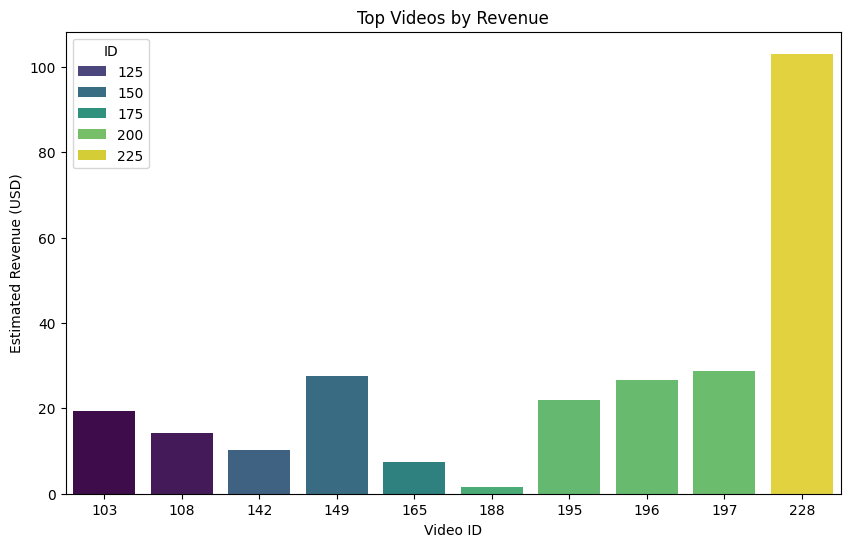

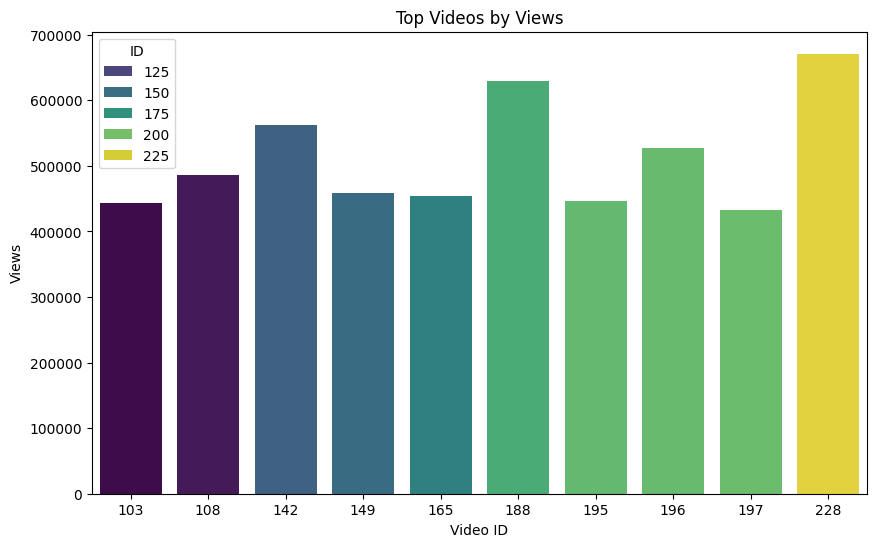

In [116]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_videos,x='ID',y='Estimated Revenue (USD)',hue='ID', palette='viridis', legend='auto')
plt.title("Top Videos by Revenue")
plt.xlabel("Video ID")
plt.ylabel("Estimated Revenue (USD)")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=top_videos,x='ID',y='Views',hue='ID',palette='viridis',legend='auto')
plt.title("Top Videos by Views")
plt.xlabel("Video ID")
plt.ylabel("Views")
plt.show()

In [117]:
## Question 2 Determine which factors most influence revenue.

In [118]:
# import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [119]:
# Identify relavant columns
key_metrices_2=youtube_data[['Views','Subscribers','Impressions','Monetized Playbacks (Estimate)']]

In [120]:
# Check missind data
pd.isna(key_metrices_2)

,Views,Subscribers,Impressions,Monetized Playbacks (Estimate)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
359,False,False,False,False
360,False,False,False,False
361,False,False,False,False
362,False,False,False,False


In [121]:
# Define features (X) and target (y)
x=key_metrices_2
y=youtube_data['Estimated Revenue (USD)']

In [122]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [123]:
# Initialize and train the Linear Regression model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [124]:
# Predict on test data
y_predic=model.predict(x_test)

In [125]:
# Evaluate the model
r2=r2_score(y_test,y_predic)
rmse=np.sqrt(mean_squared_error(y_test,y_predic))
print('r squared Score:',r2)
print('RMSE:',rmse)

r squared Score: 0.846657409128921
RMSE: 3.653898054564502


In [126]:
# Coefficients and feature importance
coefficients=pd.Series(model.coef_,index=x.columns).sort_values(ascending=False)

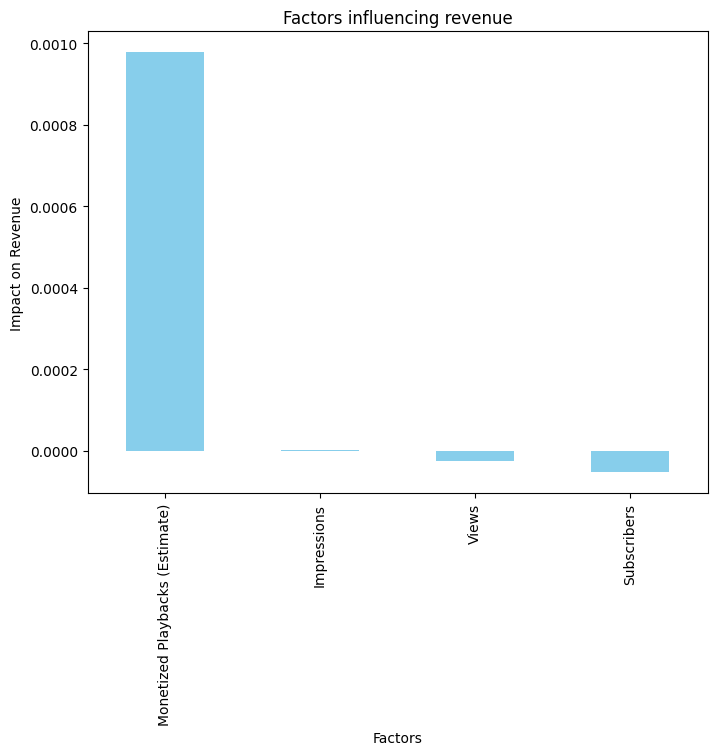

In [127]:
# Visualize 
plt.figure(figsize=(8,6))
coefficients.plot(kind='bar',color='skyblue')
plt.title('Factors influencing revenue')
plt.ylabel('Impact on Revenue')
plt.xlabel('Factors')
plt.show()

In [128]:
## Question 3 Analyze trends in revenue over time.

In [129]:
# Group revenue by Month
revenue_by_month=youtube_data.groupby('Month').agg(
    Total_Revenue=('Estimated Revenue (USD)', 'sum'))


In [130]:
# Sort data by month
revenue_by_month=revenue_by_month.sort_values('Month')

In [131]:
print(revenue_by_month)

       Total_Revenue
Month               
1            180.915
2            184.172
3            201.248
4            242.496
5            149.336
6            257.075
7            295.342
8            384.303
9            198.224
10           514.460
11           428.273
12           186.303


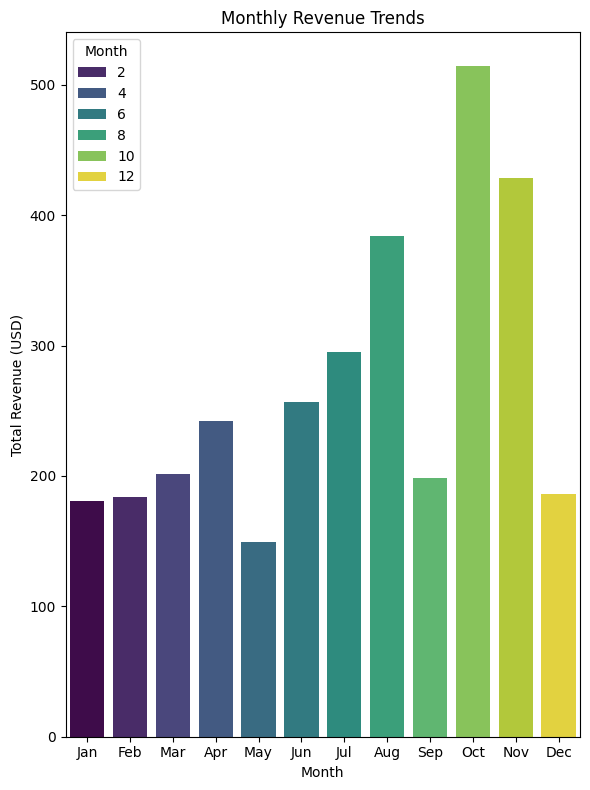

In [132]:
# Visualize revenue trends over months
plt.figure(figsize=(6,8))
sns.barplot(data=revenue_by_month,x='Month',y='Total_Revenue',hue='Month',palette='viridis',legend='auto')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel("Total Revenue (USD)")
plt.xticks(ticks=range(12),labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()

In [133]:

## Question 4 Why revenue trends are particularly higher in October and November
#  Group views and impressions by Month
monthly_analysis = youtube_data.groupby('Month').agg(
    total_views=('Views', 'sum'),  
    total_impressions=('Impressions', 'sum') 
).reset_index()


In [134]:
# Sort data by Month
monthly_analysis= monthly_analysis.sort_values('Month')

In [135]:
print(monthly_analysis)

    Month  total_views  total_impressions
0       1    3023475.0         25132191.0
1       2    2527764.0         20664403.0
2       3    3398159.0         28111333.0
3       4    3487958.0         30969580.0
4       5    2282006.0         17765946.0
5       6    4256955.0         28140845.0
6       7    5166349.0         27965915.0
7       8    4280354.0         25555852.0
8       9    4597450.0         33600949.0
9      10    5083645.0         44346000.0
10     11    4974696.0         38027376.0
11     12    3804426.0         28988027.0


<Axes: xlabel='Month', ylabel='total_views'>

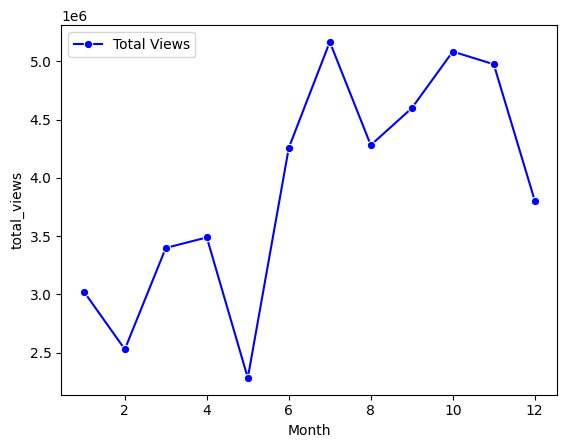

In [136]:
sns.lineplot(data=monthly_analysis, x='Month', y='total_views', marker='o', label='Total Views', color='blue')

<Axes: xlabel='Month', ylabel='total_impressions'>

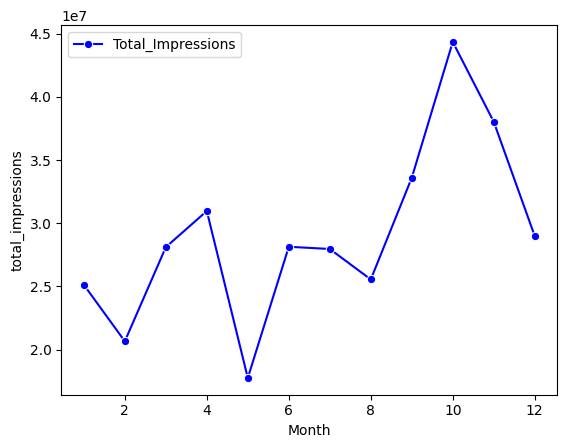

In [137]:
sns.lineplot(data=monthly_analysis,x='Month',y='total_impressions',marker='o',label='Total_Impressions',color='blue')

In [138]:
## Question 5 Assess how Day of Week Published affects viewer engagement.

In [139]:
# Convert Video publish time in Date Time format and extract day of week
youtube_data['Video Publish Time']=pd.to_datetime(youtube_data['Video Publish Time'])
youtube_data['Day_of_Week']=youtube_data['Video Publish Time'].dt.dayofweek

In [160]:
# Group by 'Day_of_Week' and calculate average engagement metrics
daywise_engagement=youtube_data.groupby('Day_of_Week').agg(
    total_views=('Views','mean')
    
)

In [161]:
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
daywise_engagement.reset_index(inplace=True)
daywise_engagement['Day_of_Week'] = daywise_engagement['Day_of_Week'].map(day_mapping)

In [162]:
daywise_engagement.head(6)

,Day_of_Week,average_views
0,Monday,132124.043478
1,Tuesday,116269.566667
2,Wednesday,130479.912281
3,Thursday,110206.800000
4,Friday,142267.037037
5,Saturday,122990.693878


<Axes: xlabel='Day_of_Week', ylabel='average_views'>

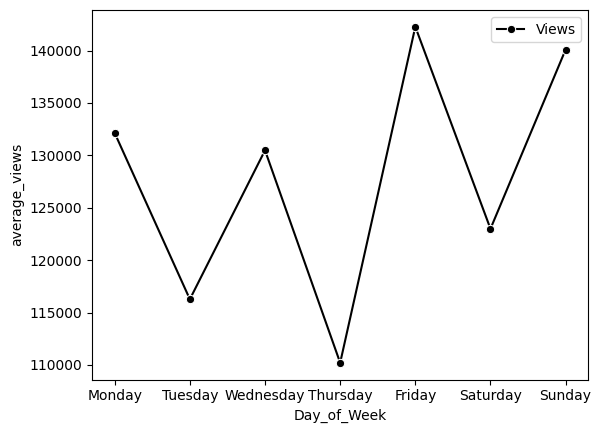

In [163]:
#Visualize Engagement by Day of the Week
sns.lineplot(data=daywise_engagement,x='Day_of_Week',y='average_views',label='Views',marker='o',color='black')

In [ ]:
## Question 6 Why dump in engagement on saturday

In [167]:
# Check the count of videos released on specific day of the week
daywise_video=youtube_data.groupby('Day_of_Week').agg(
    total_daywise_video=('Day_of_Week','count')
    
)

In [170]:
daywise_video.head(7)

,total_daywise_video
Day_of_Week,
0,46
1,60
2,57
3,35
4,54
5,49
6,63
